## Imbalanced Data

1. Imbalanced data refers to classification tasks where the classes are not represented equally.

2. why doing?.

       You need to deal with imbalanced data set when the value of finding the minority class is much
       higher than that of finding the majority

3. what data are imbalanced?

      data that need to be balanced are divided into two cases:
      
       i. In a two-class classification problem, let’s say you have 100k data points. It is                     imbalanced if only 10k data points are from class 1 and rest of them are from class 2. The           distribution ratio here is 1:9 hence its not balanced.
       
       ii. In a multi-class classification, the distribution of data points are dominated by a few             classes. In this case, the dataset is imbalanced.

Methods to solve imbalance.

There are many methods but few are:

    i.Re-sampling the dataset:is the process increasing the samples of the minority class or               decreasing the samples of the majority class to obtain a fair balance in the number of               instances for both the classes.it is divided into two types:
    
        a. Over-sampling in which we add copies of instances from the minority class.
        b. Under-sampling in which we delete instances from the majority class.
        
    ii. Changing Your Performance Metric.
  
    iii.Using different algorithms.
 
    iv.Try generating synthetic samples: A simple way to create synthetic samples is to sample the           attributes from instances in the minority class randomly.Algorithms like SMOTE can do this. 

## <div style = "color: magenta;">Data Exploration</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train_data_week_1_challenge.csv')

In [3]:
data.head()

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,continue,s01746,M,BC,0.666,0.468,0.666,7,6,other,True,305,354,86.0,1986.0
1,continue,s16986,M,BC,0.172,0.420,0.172,8,10,mother,False,331,516,15.0,1996.0
2,continue,s00147,F,BC,0.212,0.601,0.212,1,4,mother,False,311,209,14.0,1976.0
3,continue,s08104,F,ST,0.434,0.611,0.434,2,5,father,True,364,147,28.0,1911.0
4,continue,s11132,F,SC,0.283,0.478,0.283,1,10,mother,True,394,122,15.0,1889.0


In [4]:
data.shape

(17190, 15)

In [5]:
data.dtypes

continue_drop          object
student_id             object
gender                 object
caste                  object
mathematics_marks     float64
english_marks         float64
science_marks         float64
science_teacher         int64
languages_teacher       int64
guardian               object
internet                 bool
school_id               int64
total_students          int64
total_toilets         float64
establishment_year    float64
dtype: object

In [6]:
data.corr(method = 'pearson')

,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,internet,school_id,total_students,total_toilets,establishment_year
mathematics_marks,1.000000,0.551445,1.000000,0.039414,-0.014302,0.099516,0.003997,0.005824,-0.001682,-0.000346
english_marks,0.551445,1.000000,0.551445,0.034703,-0.028062,0.083902,0.013396,0.002557,-0.001294,-0.013387
science_marks,1.000000,0.551445,1.000000,0.039414,-0.014302,0.099516,0.003997,0.005824,-0.001682,-0.000346
science_teacher,0.039414,0.034703,0.039414,1.000000,0.001497,0.008578,-0.016493,-0.002494,-0.003854,0.010901
languages_teacher,-0.014302,-0.028062,-0.014302,0.001497,1.000000,-0.055652,0.002478,0.013494,0.021123,-0.004619
internet,0.099516,0.083902,0.099516,0.008578,-0.055652,1.000000,0.011233,-0.005701,-0.007265,-0.011339
school_id,0.003997,0.013396,0.003997,-0.016493,0.002478,0.011233,1.000000,-0.126451,-0.168506,-0.023198
total_students,0.005824,0.002557,0.005824,-0.002494,0.013494,-0.005701,-0.126451,1.000000,0.300946,0.041296
total_toilets,-0.001682,-0.001294,-0.001682,-0.003854,0.021123,-0.007265,-0.168506,0.300946,1.000000,-0.164720
establishment_year,-0.000346,-0.013387,-0.000346,0.010901,-0.004619,-0.011339,-0.023198,0.041296,-0.164720,1.000000


In [7]:
data.skew()

mathematics_marks     0.013356
english_marks         0.048216
science_marks         0.013356
science_teacher       0.199848
languages_teacher     0.109818
internet             -1.951330
school_id             0.104628
total_students        0.293873
total_toilets         1.545807
establishment_year   -0.242769
dtype: float64

## <div style = "color: magenta;">Data cleaning</div>

In [8]:
data.isnull().sum()

continue_drop           0
student_id              0
gender                  0
caste                   0
mathematics_marks       0
english_marks           0
science_marks           0
science_teacher         0
languages_teacher       0
guardian                0
internet                0
school_id               0
total_students          0
total_toilets         312
establishment_year    312
dtype: int64

In [12]:
data.total_toilets.fillna(data.total_toilets.mean(),inplace=True)
data.establishment_year.fillna(data.establishment_year.mean(),inplace=True)

In [13]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
data['gender'] = number.fit_transform(data['gender'].astype('str'))
data['caste'] = number.fit_transform(data['caste'].astype('str'))
data['internet'] = number.fit_transform(data['internet'].astype('str'))
data['guardian'] = number.fit_transform(data['guardian'].astype('str'))
data['continue_drop'] = number.fit_transform(data['continue_drop'].astype('str'))
data['student_id'] = number.fit_transform(data['student_id'].astype('str'))

In [14]:
data.head()

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,0,6313,1,0,0.666,0.468,0.666,7,6,3,1,305,354,86.0,1986.0
1,0,5863,1,0,0.172,0.420,0.172,8,10,2,0,331,516,15.0,1996.0
2,0,3336,0,0,0.212,0.601,0.212,1,4,2,0,311,209,14.0,1976.0
3,0,14161,0,3,0.434,0.611,0.434,2,5,0,1,364,147,28.0,1911.0
4,0,17182,0,2,0.283,0.478,0.283,1,10,2,1,394,122,15.0,1889.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024AB9EAB550>,
      dtype=object)

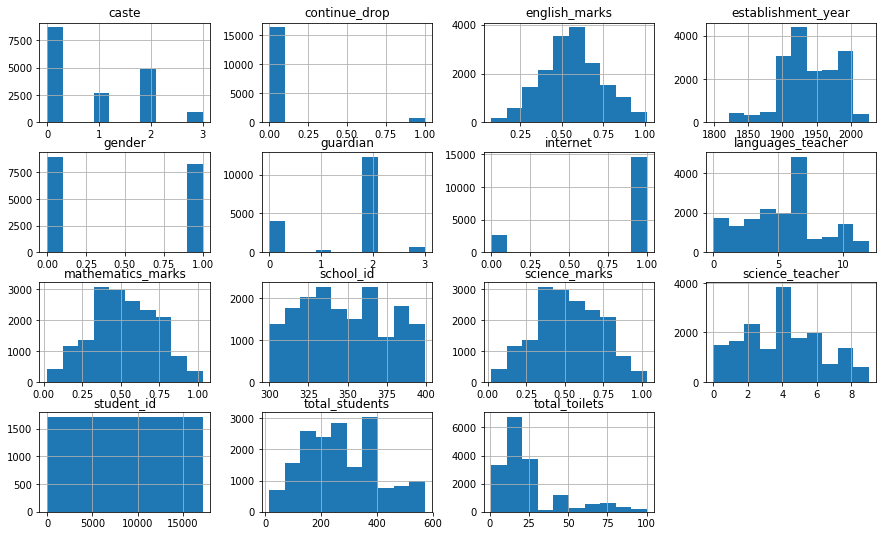

In [15]:
data.hist(figsize = (15,9))

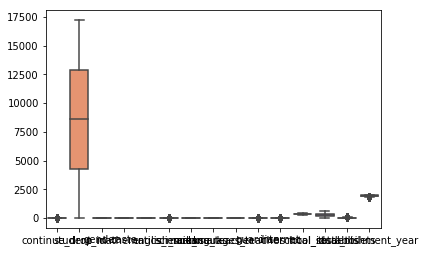

In [16]:
fig, ax = plt.subplots()
sns.boxplot(data=data, orient='v')
plt.show()

In [17]:
data.columns

Index(['continue_drop', 'student_id', 'gender', 'caste', 'mathematics_marks',
       'english_marks', 'science_marks', 'science_teacher',
       'languages_teacher', 'guardian', 'internet', 'school_id',
       'total_students', 'total_toilets', 'establishment_year'],
      dtype='object')

In [18]:
Q3, Q1 = np.percentile(data['establishment_year'], [75, 25])
iqr = Q3 - Q1
whisker = Q3 - (1.5*iqr)
print('Inter quatile range: ', iqr)
print('Whisker            : ', whisker)

data['establishment_year'] = data['establishment_year'].clip(lower=whisker)

Inter quatile range:  60.0
Whisker            :  1881.0


In [19]:
Q3, Q1 = np.percentile(data['total_toilets'], [75, 25])
iqr = Q3 - Q1
whisker = Q3 - (1.5*iqr)
print('Inter quatile range: ', iqr)
print('Whisker            : ', whisker)

data['total_toilets'] = data['total_toilets'].clip(lower=whisker)

Inter quatile range:  14.0
Whisker            :  7.0


In [20]:
Q3, Q1 = np.percentile(data['total_toilets'], [75, 25])
iqr = Q3 - Q1
whisker = Q3 + (1.5*iqr)
print('Inter quatile range: ', iqr)
print('Whisker            : ', whisker)

data['total_toilets'] = data['total_toilets'].clip(upper=whisker)

Inter quatile range:  14.0
Whisker            :  49.0


In [21]:
Q3, Q1 = np.percentile(data['english_marks'], [75, 25])
iqr = Q3 - Q1
whisker = Q3 - (1.5*iqr)
print('Inter quatile range: ', iqr)
print('Whisker            : ', whisker)

data['english_marks'] = data['english_marks'].clip(lower=whisker)

Inter quatile range:  0.21700000000000003
Whisker            :  0.3415


In [22]:
Q3, Q1 = np.percentile(data['guardian'], [75, 25])
iqr = Q3 - Q1
whisker = Q3 - (1.5*iqr)
print('Inter quatile range: ', iqr)
print('Whisker            : ', whisker)

data['guardian'] = data['guardian'].clip(lower=whisker)

Inter quatile range:  0.0
Whisker            :  2.0


In [23]:
Q3, Q1 = np.percentile(data['internet'], [75, 25])
iqr = Q3 - Q1
whisker = Q3 - (1.5*iqr)
print('Inter quatile range: ', iqr)
print('Whisker            : ', whisker)

data['internet'] = data['internet'].clip(lower=whisker)

Inter quatile range:  0.0
Whisker            :  1.0


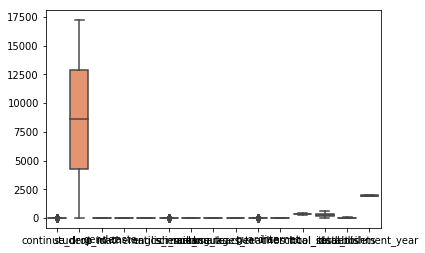

In [24]:
fig, ax = plt.subplots()
sns.boxplot(data=data, orient='v')
plt.show()

### <div style = "color: magenta;">Checking imbalance</div>

In [25]:
data['continue_drop'].value_counts()

0    16384
1      806
Name: continue_drop, dtype: int64

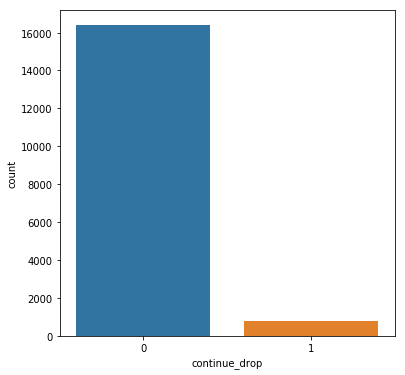

In [36]:
plt.figure(figsize=(6, 6))
sns.countplot('continue_drop', data=data)

### <div style = "color: magenta;">Undersampling the feature to make balance</div>

In [37]:
# Shuffle the Dataset.
shuffled_df = data.sample(frac=1,random_state=4)

# amount of fraud classes 492 rows.
fraud_df = shuffled_df.loc[shuffled_df['continue_drop'] == 1]

#Randomly select 492 observations.
non_fraud_df = shuffled_df.loc[shuffled_df['continue_drop'] == 0].sample(n=806,random_state=42)
data_b = pd.concat([fraud_df, non_fraud_df])

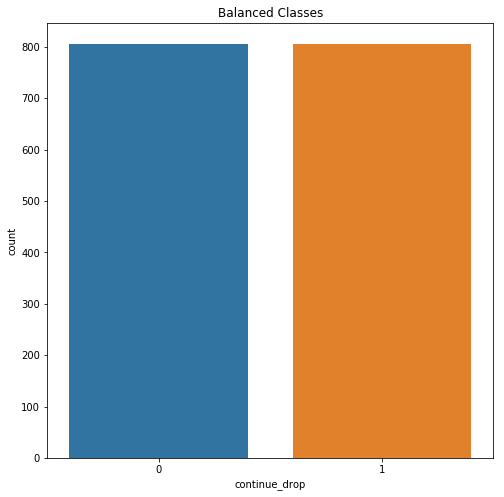

In [35]:
plt.figure(figsize=(6, 6))
sns.countplot('continue_drop', data=data_b)
plt.title('Balanced Classes')
plt.show()

## <div style = "color: magenta;">Model selection</div>

In [38]:
data.columns

Index(['continue_drop', 'student_id', 'gender', 'caste', 'mathematics_marks',
       'english_marks', 'science_marks', 'science_teacher',
       'languages_teacher', 'guardian', 'internet', 'school_id',
       'total_students', 'total_toilets', 'establishment_year'],
      dtype='object')

In [39]:
features = (['student_id', 'gender', 'caste', 'mathematics_marks',
       'english_marks', 'science_marks', 'science_teacher',
       'languages_teacher', 'guardian', 'internet', 'school_id',
       'total_students', 'total_toilets', 'establishment_year'])

In [40]:
target =(['continue_drop'])

In [41]:
X = data[features]
y = data[target]

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

In [44]:
models = []

models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('GB', GradientBoostingClassifier()))
models.append(('GNB', GaussianNB()))

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state = 42)

In [48]:
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(f1_score(y_test, y_pred))
    names.append(name)

results = pd.DataFrame({'Model': names, 'Accuracy': scores})
results

,Model,Accuracy
0,LR,0.000000
1,KNN,0.000000
2,DT,1.000000
3,RF,1.000000
4,GB,0.968586
5,GNB,0.000000


In [49]:
folds = StratifiedKFold(n_splits=10, random_state=42)

In [50]:
names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=folds, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

results = pd.DataFrame({'Model': names, 'Accuracy': scores})
results

,Model,Accuracy
0,LR,0.953112
1,KNN,0.952589
2,DT,1.000000
3,RF,1.000000
4,GB,0.997557
5,GNB,0.952996


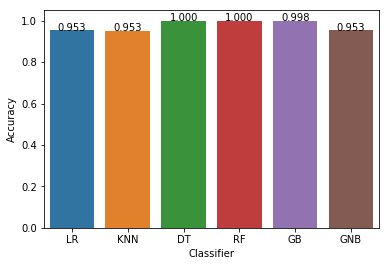

In [51]:
axis = sns.barplot(x ='Model', y ='Accuracy', data = results)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.0005, '{:1.3f}'.format(height), ha="center") 
    
plt.show()

In [52]:
from sklearn.feature_selection import RFECV

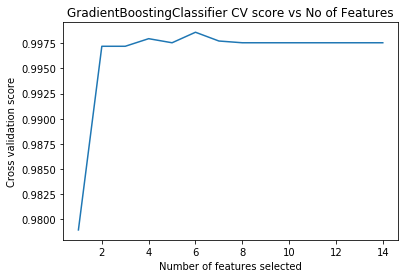

In [53]:
gb = GradientBoostingClassifier()

classifier = RFECV(estimator=gb, step=1, cv=folds, scoring='accuracy')
classifier.fit(X, y)

plt.figure()
plt.title('GradientBoostingClassifier CV score vs No of Features')
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score')
plt.plot(range(1, len(classifier.grid_scores_) + 1), classifier.grid_scores_)
plt.show()

In [54]:
classifier.grid_scores_.tolist()

[0.9789414758739795,
 0.9972079150838772,
 0.9972079150838772,
 0.9979633906233092,
 0.9975566844922481,
 0.9986033651893764,
 0.9977313738281444,
 0.9975572259547383,
 0.9975572259547383,
 0.9975572259547383,
 0.9975572259547383,
 0.9975572259547383,
 0.9975572259547383,
 0.9975572259547383]

In [55]:
feature_importance = list(zip(features, classifier.support_))

keys = []
new_features = []

for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['caste', 'mathematics_marks', 'english_marks', 'science_marks', 'science_teacher', 'languages_teacher']


In [56]:
X_new = data[new_features]

initial_accuracy = cross_val_score(gb, X, y, cv=folds, scoring='accuracy').mean()
print('Accuracy without feature selection: {:.5f} '.format(initial_accuracy))

new_accuracy = cross_val_score(gb, X_new, y, cv=folds, scoring='accuracy').mean()
print('Accuracy with feature selection:    {:.5f} '.format(new_accuracy))
diffrence = new_accuracy - initial_accuracy

Accuracy without feature selection: 0.99756 
Accuracy with feature selection:    0.99820 
